## Загрузка данных с помощью DataLoader

In [1]:
import torch
print(torch.__version__)

2.0.1


In [2]:
# Скачиваем датасет
from torchvision import datasets

download_dir = "./dataset"

# Скачиваем обучающую выборку
train_data = datasets.STL10(root=download_dir, download=True, split="train")

# Скачиваем валидационную выборку
val_data = datasets.STL10(root=download_dir, download=True, split="test")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2640397119/2640397119 [04:56<00:00, 8892317.87it/s]


Extracting ./dataset/stl10_binary.tar.gz to ./dataset
Files already downloaded and verified


In [3]:
# Объекты данных из обучающей выборки (5.000 цветных картинок размеров 96 x 96)
x_train = torch.tensor(train_data.data) / 255.
x_train.shape

torch.Size([5000, 3, 96, 96])

In [4]:
# Цели предсказания для обучающей выборки (5.000 чисел от 0 до 9)
y_train = torch.tensor(train_data.labels)

print(y_train.shape, y_train.min(), y_train.max(), sep="\n")

torch.Size([5000])
tensor(0, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)


In [5]:
classes = train_data.classes
classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [6]:
classes_ru = [
    "самолёт",
    "птица",
    "машина",
    "кошка",
    "олень",
    "собака",
    "лошадь",
    "обезьяна",
    "корабль",
    "грузовик",
]

In [7]:
# Аналогично записываем x и y для валидационной выборки (8.000 примеров)
x_val = torch.tensor(val_data.data) / 255.
y_val = torch.tensor(val_data.labels)

print(x_val.shape, y_val.shape, sep="\n")

torch.Size([8000, 3, 96, 96])
torch.Size([8000])


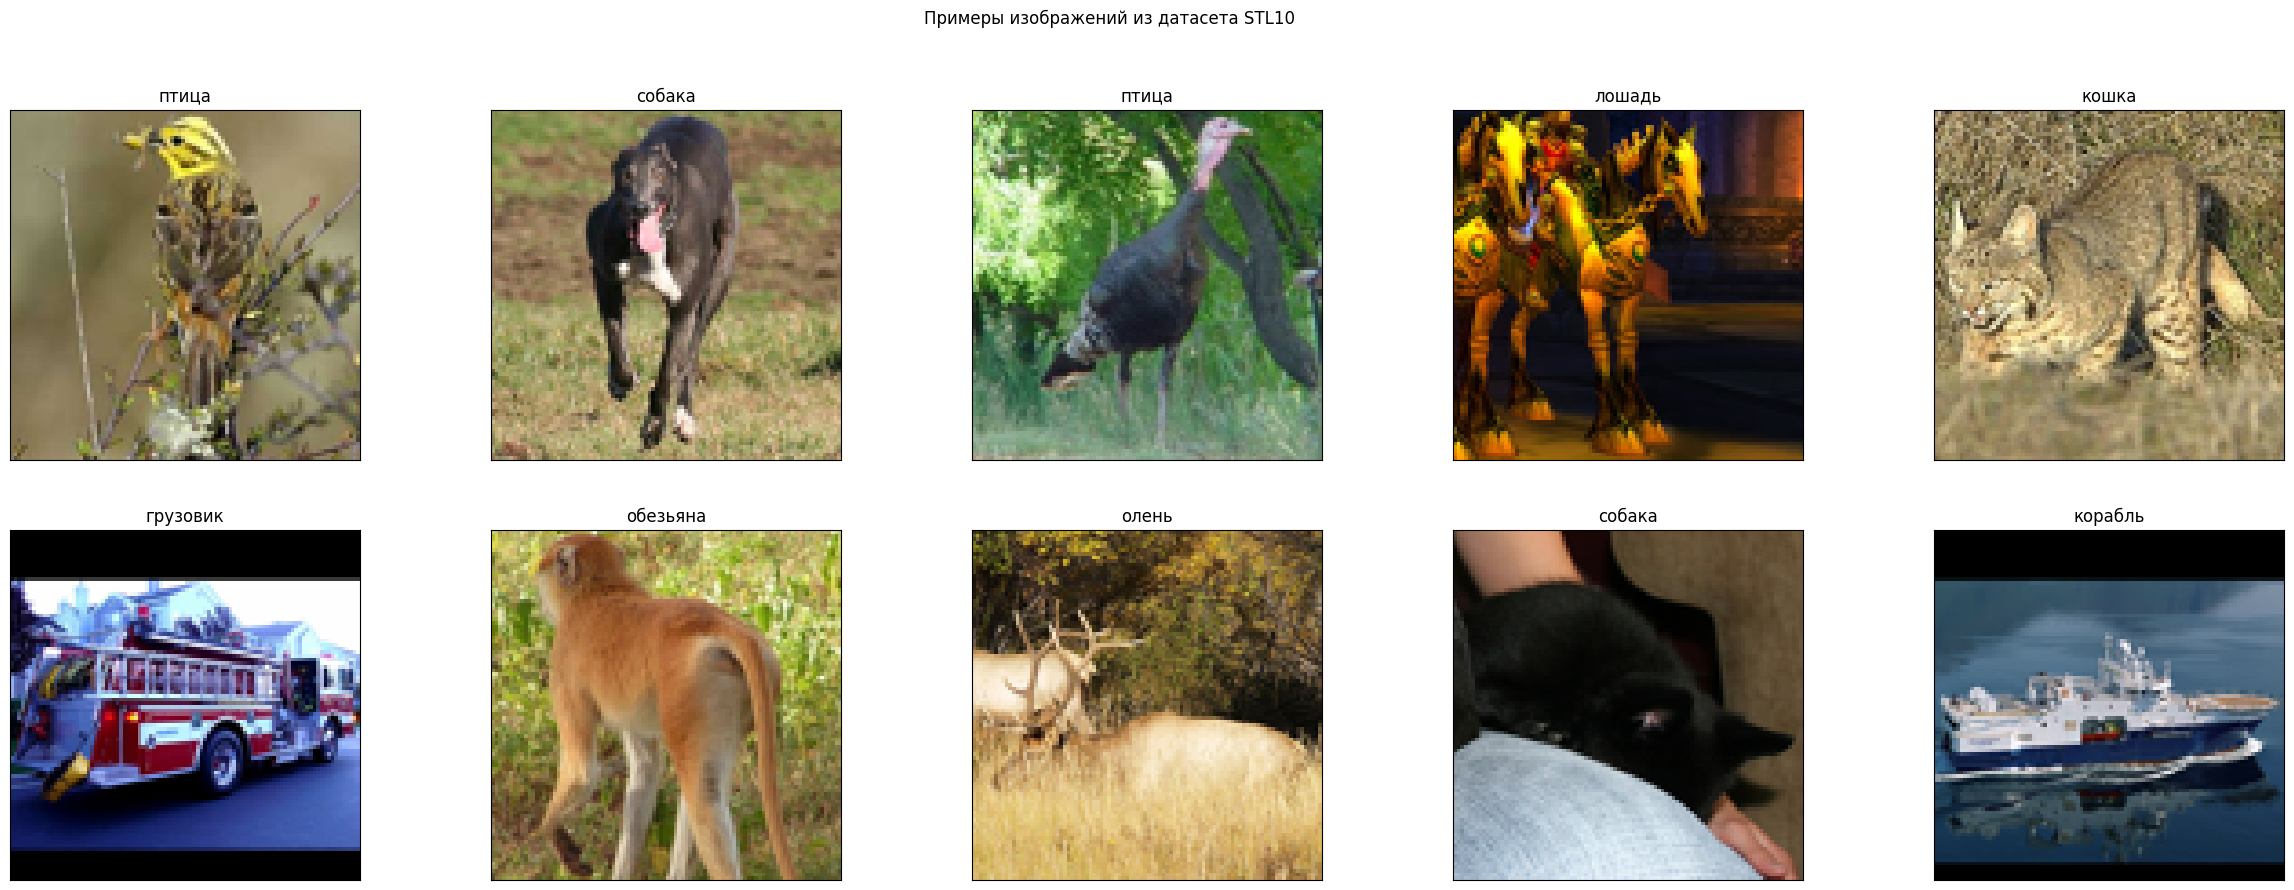

In [8]:
# Посмотрим на то, как выглядят картинки из датасета

import matplotlib.pyplot as plt
%matplotlib inline

hh = 2
ww = 5

fig, ax = plt.subplots(hh, ww, figsize=(30, 5 * hh))
fig.suptitle("Примеры изображений из датасета STL10")

for i, (x, y) in enumerate(zip(x_train, y_train)):
    if i >= hh * ww:
        break
    plt.subplot(hh, ww, i + 1)
    plt.imshow(x.permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])
    plt.title(classes_ru[y])
plt.show()

In [9]:
# Изначально
x_train.shape

torch.Size([5000, 3, 96, 96])

In [10]:
# Похоже на torch.nn.Module, но это специальная обёртка для датасетов
class MyDataset(torch.utils.data.Dataset):  # --> наследуем класс от Dataset
    def __init__(self, x, y):  # Первая функция для инициализации
        self.x = x
        self.y = y
    
    def __len__(self):  # Вторая функция для получения размера датасета
        return len(self.x)
    
    def __getitem__(self, index):  # Третья для получения данных по индексу
        return self.x[index], self.y[index]  # Храним и возвращаем как данные, так и целевые значения

In [11]:
train_dataset = MyDataset(x_train, y_train)
train_dataset

In [12]:
train_dataset[0]

(tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
          [0.5725, 0.5725, 0.5725,  ..., 0.6392, 0.6392, 0.6392],
          [0.5725, 0.5725, 0.5725,  ..., 0.6431, 0.6431, 0.6431],
          ...,
          [0.5098, 0.5176, 0.4588,  ..., 0.5373, 0.5882, 0.5529],
          [0.5255, 0.6078, 0.3451,  ..., 0.5294, 0.5333, 0.5373],
          [0.5294, 0.3804, 0.4549,  ..., 0.5412, 0.5765, 0.5412]],
 
         [[0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          ...,
          [0.4471, 0.4667, 0.4078,  ..., 0.5176, 0.5412, 0.4784],
          [0.4627, 0.5529, 0.2902,  ..., 0.5137, 0.4863, 0.4706],
          [0.4667, 0.3255, 0.4078,  ..., 0.4980, 0.5333, 0.5020]],
 
         [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ...,

In [19]:
# Специальная обёртка Даталоадер позваляет не прописывать вручную батчевание
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # Датасет (обязательно в формате torch.utils.data.Dataset)
    batch_size=100,  # Размер батча
    shuffle=True,  # Перемешивать ли данные при формировании даталоадера
    drop_last=True,  # Если не хватает объектов для полного батча, то выкинуть ли такой батч
)

In [20]:
# Мы получили удобный объект, итерируясь по которому мы можем получать сразу батчи из данных
for imgs, targets in train_dataloader:
    print(imgs.shape, targets.shape, sep="\n")
    break

torch.Size([100, 3, 96, 96])
torch.Size([100])
